In [1]:
# transformers: Provides tools for NLP, pandas: Handles data analysis and manipulation
!pip install transformers pandas

In [2]:
# Importing required libraries
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

# Load dataset and initialize NER pipeline
data = pd.read_csv('/content/punjabi_dataset_healthcare_cleaned.csv')

# Change model to Hindi-specific one
ner_pipeline = pipeline("ner", model="ai4bharat/IndicNER", grouped_entities=True, aggregation_strategy="simple")
# ner_pipeline = pipeline("ner", model="cfilt/HiNER-original-xlm-roberta-large", aggregation_strategy="simple")
# ner_pipeline = pipeline("ner", model="cfilt/HiNER-original-xlm-roberta-large", aggregation_strategy="simple", grouped_entities=True)
# ner_pipeline = pipeline("ner", model="Davlan/bert-base-multilingual-cased-ner-hrl", aggregation_strategy="simple")

# Use a pipeline as a high-level helper
target_columns = data.columns.tolist()


# Initialize counters for visualization
entity_counts = {
    'before': {'PER': 0, 'ORG': 0, 'LOC': 0},
    'after': {'PER': 0, 'ORG': 0, 'LOC': 0}
}

# Pseudonymization function
def pseudonymize_with_transformers(text):
    """
    Returns pseudonymized text and list of replaced entities
    """
    try:
        # Run NER on the text
        entities = ner_pipeline(text)
        original_text = text
        pseudonymized_text = text
        replaced_entities = []

        # Process entities in reverse order
        if len(entities) > 0:
          reversed(sorted(entities, key=lambda x: x['start']))

        for entity in reversed(sorted(entities, key=lambda x: x['start'])):
            if entity["entity_group"] in ["PER", "ORG", "LOC"] and (entity["end"] - entity["start"] > 2):
                start = entity["start"]
                end = entity["end"]
                original_entity = original_text[start:end]
                replacement = f"{entity['entity_group']}_REPLACEMENT"

                # Update text and counters
                pseudonymized_text = pseudonymized_text[:start] + replacement + pseudonymized_text[end:]
                replaced_entities.append({
                    'entity_type': entity['entity_group'],
                    'original_value': original_entity,
                    'replacement_value': replacement
                })

                # Update visualization counters
                entity_counts['before'][entity['entity_group']] += 1
                entity_counts['after'][entity['entity_group']] += 1

        return pseudonymized_text, replaced_entities

    except Exception as e:
        print(f"Error during pseudonymization: {e}")
        return text, []

# Process data and build outputs
comparison_records = []

# Iterate over each row in the dataset
for row_idx, row in data.iterrows():
    row_changes = []
    # Use all columns from the dataset
    for col_name in target_columns:
        original_value = str(row[col_name]) if pd.notnull(row[col_name]) else ""
        pseudonymized_value, entities = pseudonymize_with_transformers(original_value)

        # Update DataFrame with pseudonymized values
        pseudonymized_column_name = f'Pseudonymized_{col_name}'
        data.at[row_idx, pseudonymized_column_name] = pseudonymized_value

        # Record changes
        if entities:
            for entity in entities:
                row_changes.append({
                    'Row': row_idx + 1,
                    'Column': col_name,
                    'Entity Type': entity['entity_type'],
                    'Original': entity['original_value'],
                    'Replacement': entity['replacement_value'],
                    'Full Original': original_value,
                    'Full Pseudonymized': pseudonymized_value
                })

    if row_changes:
        comparison_records.extend(row_changes)

# ======================
# 1. Display Table
# ======================
if comparison_records:
    comparison_df = pd.DataFrame(comparison_records)[[
        'Row', 'Column', 'Entity Type', 'Original', 'Replacement',
        'Full Original', 'Full Pseudonymized'
    ]]

    print("\n=== Detailed Changes Table ===")
    print(comparison_df.to_string(index=False, max_colwidth=30))
else:
    print("No entities replaced.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/667M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



=== Detailed Changes Table ===
 Row             Column Entity Type                     Original     Replacement                  Full Original             Full Pseudonymized
 106          Diagnosis         PER                       ਜੇ ਕਮਰ PER_REPLACEMENT ਸੱਜੇ ਕਮਰ ਦਾ ਬੋਨ ਮੈਰੋ ਐਡੀਮਾ ... ਸੱPER_REPLACEMENT ਦਾ ਬੋਨ ਮੈ...
 107          Diagnosis         PER                       ਜੇ ਕਮਰ PER_REPLACEMENT ਸੱਜੇ ਕਮਰ ਦਾ ਬੋਨ ਮੈਰੋ ਐਡੀਮਾ ... ਸੱPER_REPLACEMENT ਦਾ ਬੋਨ ਮੈ...
 206          Diagnosis         PER                       ਜੇ ਕਮਰ PER_REPLACEMENT ਸੱਜੇ ਕਮਰ ਦਾ ਬੋਨ ਮੈਰੋ ਐਡੀਮਾ ... ਸੱPER_REPLACEMENT ਦਾ ਬੋਨ ਮੈ...
 207          Diagnosis         PER                       ਜੇ ਕਮਰ PER_REPLACEMENT ਸੱਜੇ ਕਮਰ ਦਾ ਬੋਨ ਮੈਰੋ ਐਡੀਮਾ ... ਸੱPER_REPLACEMENT ਦਾ ਬੋਨ ਮੈ...
 314          Diagnosis         PER                       ਜੇ ਕਮਰ PER_REPLACEMENT ਸੱਜੇ ਕਮਰ ਦਾ ਬੋਨ ਮੈਰੋ ਐਡੀਮਾ ... ਸੱPER_REPLACEMENT ਦਾ ਬੋਨ ਮੈ...
 315          Diagnosis         PER                       ਜੇ ਕਮਰ PER_REPLACEMENT ਸੱਜੇ ਕਮਰ ਦਾ ਬੋਨ ਮੈਰੋ ਐਡੀਮਾ ..


=== Visualization ===


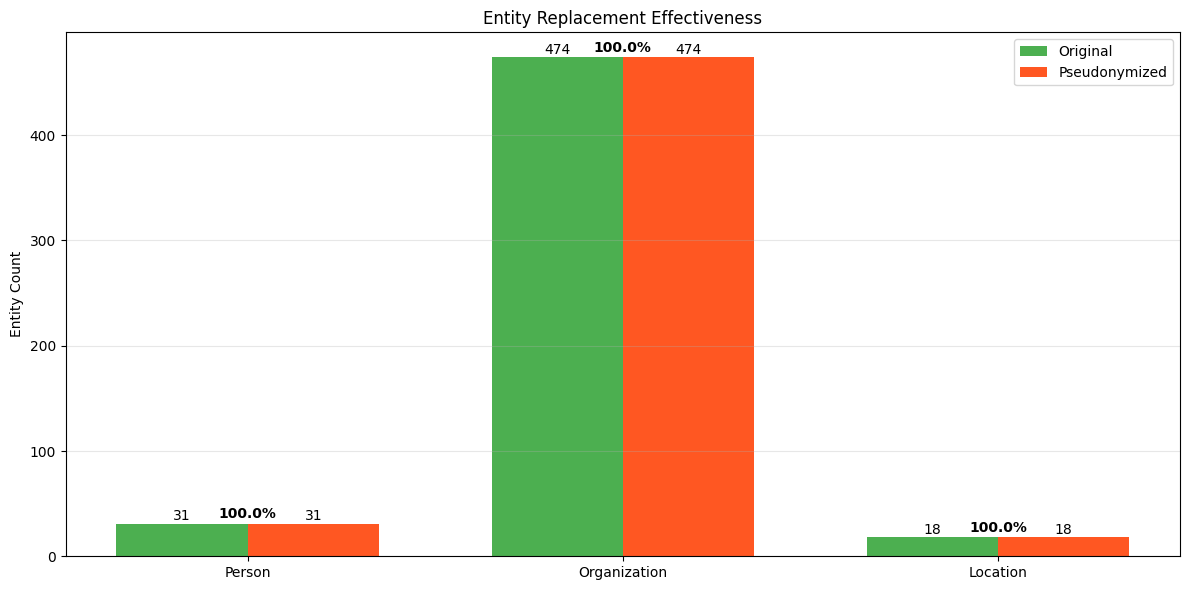

In [3]:
# ======================
# 2. Generate Plot
# ======================

labels = ['Person', 'Organization', 'Location']
before = [entity_counts['before'][k] for k in ['PER', 'ORG', 'LOC']]
after = [entity_counts['after'][k] for k in ['PER', 'ORG', 'LOC']]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, before, width, label='Original', color='#4CAF50')
plt.bar(x + width/2, after, width, label='Pseudonymized', color='#FF5722')

plt.xticks(x, labels)
plt.ylabel('Entity Count')
plt.title('Entity Replacement Effectiveness')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add annotations
for i, (b, a) in enumerate(zip(before, after)):
    plt.text(i - width/2, b + 0.5, f'{b}', ha='center', va='bottom')
    plt.text(i + width/2, a + 0.5, f'{a}', ha='center', va='bottom')
    percentage = (a/b)*100 if b > 0 else 0
    plt.text(i, max(b,a) + 5, f'{percentage:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
print("\n=== Visualization ===")
plt.show()

In [4]:
output_path = '/content/updated_result_with_AI_PUNJABI.csv'
data.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"\nSaved pseudonymized data to: {output_path}")



Saved pseudonymized data to: /content/updated_result_with_AI_PUNJABI.csv


In [5]:
# ======================
# Calculate Percentages
# ======================

def calculate_percentages(before, after):
    percentages = {}
    for ent_type in ['PER', 'ORG', 'LOC']:
        try:
            percentages[ent_type] = (after[ent_type] / before[ent_type]) * 100
        except ZeroDivisionError:
            percentages[ent_type] = 0.0
    return percentages

# Get percentages
replacement_percentages = calculate_percentages(
    entity_counts['before'],
    entity_counts['after']
)

# Create and display percentage table
percentage_df = pd.DataFrame({
    'Entity Type': ['Person (PER)', 'Organization (ORG)', 'Location (LOC)'],
    'Total Entities': [entity_counts['before']['PER'],
                      entity_counts['before']['ORG'],
                      entity_counts['before']['LOC']],
    'Replaced Entities': [entity_counts['after']['PER'],
                         entity_counts['after']['ORG'],
                         entity_counts['after']['LOC']],
    'Replacement Rate (%)': [replacement_percentages['PER'],
                            replacement_percentages['ORG'],
                            replacement_percentages['LOC']]
})

print("\n=== Replacement Effectiveness Summary ===")
print(percentage_df.to_string(index=False, float_format="%.1f"))


=== Replacement Effectiveness Summary ===
       Entity Type  Total Entities  Replaced Entities  Replacement Rate (%)
      Person (PER)              31                 31                 100.0
Organization (ORG)             474                474                 100.0
    Location (LOC)              18                 18                 100.0
